### Transfer Learnig (전이 학습)

In [1]:
# cats_and_dogs classification model with InceptionV3
# train : 2000 images [cat(1000) + dog(1000)]  , size는 다름
# validation : 1000 images [cat(500) + dog(500)] , size는 다름

In [9]:
import tensorflow as tf
import urllib
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras import layers
from tensorflow.keras import Model
import warnings
warnings.filterwarnings(action='ignore')

print(tf.__version__)

2.17.0


In [ ]:
# Colab용 : Linux/GPU사용 
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#     -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [4]:
# Google InceptionV3 pretrained model 가중치 다운로드, Windows용
_INCEPTION_URL = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
urllib.request.urlretrieve(_INCEPTION_URL, 'tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

('tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5',
 <http.client.HTTPMessage at 0x1887ac99540>)

In [11]:
# 사전 훈련된 가중치 불러오기
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = 'tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

# 사전 훈련 계층의 가중치의 훈련(학습) 가능 여부를 설정 : False(학습 안함)
for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

# 마지막 층 출력 확인하기
last_layer = pre_trained_model.get_layer('mixed7')
# print('last layer output shape: ', last_layer.output_shape)  #  (None, 7, 7, 768)
last_output = last_layer.output  

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_282 (Conv2D)           │ (None, 74, 74, 32)        │             864 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_282       │ (None, 74, 74, 32)        │              96 │ conv2d_282[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_282 (Activation)   │ (None, 74, 74, 32)        │               0 │ batch_normalization_282[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_283 (Conv2D)           │ (None, 72, 72, 32)        │           9,216 │ activation_282[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_283       │ (None, 72, 72, 32)        │              96 │ conv2d_283[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_283 (Activation)   │ (None, 72, 72, 32)        │               0 │ batch_normalization_283[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_284 (Conv2D)           │ (None, 72, 72, 64)        │          18,432 │ activation_283[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_284       │ (None, 72, 72, 64)        │             192 │ conv2d_284[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_284 (Activation)   │ (None, 72, 72, 64)        │               0 │ batch_normalization_284[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_12              │ (None, 35, 35, 64)        │               0 │ activation_284[0][0]       │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_285 (Conv2D)           │ (None, 35, 35, 80)        │           5,120 │ max_pooling2d_12[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_285       │ (None, 35, 35, 80)        │             240 │ conv2d_285[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_285 (Activation)   │ (None, 35, 35, 80)        │               0 │ batch_normalization_285[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_286 (Conv2D)           │ (None, 33, 33, 192)       │         138,24

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

                                                                                                  
 activation_42 (Activation)  (None, 7, 7, 160)            0         ['batch_normalization_42[0][0]
                                                                    ']                            
                                                                                                  
 activation_47 (Activation)  (None, 7, 7, 160)            0         ['batch_normalization_47[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 7, 7, 768)            0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40

 batch_normalization_52 (Ba  (None, 7, 7, 160)            480       ['conv2d_52[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_57 (Ba  (None, 7, 7, 160)            480       ['conv2d_57[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_52 (Activation)  (None, 7, 7, 160)            0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 7, 7, 160)            0         ['batch_normalization_57[0][0]
          

                                                                                                  
 conv2d_62 (Conv2D)          (None, 7, 7, 192)            258048    ['activation_61[0][0]']       
                                                                                                  
 conv2d_67 (Conv2D)          (None, 7, 7, 192)            258048    ['activation_66[0][0]']       
                                                                                                  
 batch_normalization_62 (Ba  (None, 7, 7, 192)            576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 7, 7, 192)            576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
          

 activation_70 (Activation)  (None, 7, 7, 192)            0         ['batch_normalization_70[0][0]
                                                                    ']                            
                                                                                                  
 activation_74 (Activation)  (None, 7, 7, 192)            0         ['batch_normalization_74[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_71 (Conv2D)          (None, 3, 3, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 3, 3, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_nor

 activation_78 (Activation)  (None, 3, 3, 384)            0         ['batch_normalization_78[0][0]
                                                                    ']                            
                                                                                                  
 activation_79 (Activation)  (None, 3, 3, 384)            0         ['batch_normalization_79[0][0]
                                                                    ']                            
                                                                                                  
 activation_82 (Activation)  (None, 3, 3, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 3, 3, 384)            0         ['batch_normalization_83[0][0]
          

 batch_normalization_85 (Ba  (None, 3, 3, 320)            960       ['conv2d_85[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_87 (Activation)  (None, 3, 3, 384)            0         ['batch_normalization_87[0][0]
                                                                    ']                            
                                                                                                  
 activation_88 (Activation)  (None, 3, 3, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 3, 3, 384)            0         ['batch_normalization_91[0][0]
          

In [12]:
# 모델구성/컴파일
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_282 (Conv2D)           │ (None, 74, 74, 32)        │             864 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_282       │ (None, 74, 74, 32)        │              96 │ conv2d_282[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_282 (Activation)   │ (None, 74, 74, 32)        │               0 │ batch_normalization_282[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_283 (Conv2D)           │ (None, 72, 72, 32)        │           9,216 │ activation_282[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_283       │ (None, 72, 72, 32)        │              96 │ conv2d_283[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_283 (Activation)   │ (None, 72, 72, 32)        │               0 │ batch_normalization_283[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_284 (Conv2D)           │ (None, 72, 72, 64)        │          18,432 │ activation_283[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_284       │ (None, 72, 72, 64)        │             192 │ conv2d_284[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_284 (Activation)   │ (None, 72, 72, 64)        │               0 │ batch_normalization_284[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_12              │ (None, 35, 35, 64)        │               0 │ activation_284[0][0]       │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_285 (Conv2D)           │ (None, 35, 35, 80)        │           5,120 │ max_pooling2d_12[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_285       │ (None, 35, 35, 80)        │             240 │ conv2d_285[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_285 (Activation)   │ (None, 35, 35, 80)        │               0 │ batch_normalization_285[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_286 (Conv2D)           │ (None, 33, 33, 192)       │         138,24

 Total params: 47,512,481 (181.25 MB)

 Trainable params: 38,537,217 (147.01 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

 conv2d_30 (Conv2D)          (None, 7, 7, 192)            147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 7, 7, 192)            172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 7, 7, 192)            172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 7, 7, 192)            147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 7, 7, 192)            576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 7, 7, 768)            0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 7, 7, 192)            147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 7, 7, 192)            215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 7, 7, 192)            215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 7, 7, 160)            0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 7, 7, 160)            0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 7, 7, 768)            0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 7, 7, 192)            576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 7, 7, 192)            576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 7, 7, 192)            0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 7, 7, 192)            0         ['batch_normalization_67[0][0]
          

In [7]:
# Colab용 : Linux/GPU사용 
# !wget --no-check-certificate \
#   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#   -O /tmp/cats_and_dogs_filtered.zip

In [13]:
# cats_and_dogs 데이터셋 다운로드 , Windows용
_TRAIN_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
urllib.request.urlretrieve(_TRAIN_URL, 'tmp/cats_and_dogs_filtered.zip')

('tmp/cats_and_dogs_filtered.zip', <http.client.HTTPMessage at 0x188099ec0d0>)

In [14]:
# 압축해제
local_zip = 'tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

In [15]:
# 이미지 데이터 경로 설정
import os

base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

### 데이터 전처리 : 이미지 증강(Image Augmentation)

In [16]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 학습

In [18]:
# Colab , GPU : 약 06분 소요
# CPU    : 약 27분 소요
# 사전 훈련 가중치는 업데이트 하지 않고 추가 계층만 가중치 업데이트하여 학습
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            # validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 44s - 435ms/step - accuracy: 0.9115 - loss: 0.2129 - val_accuracy: 0.9640 - val_loss: 0.0934
Epoch 2/20
100/100 - 11s - 115ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9640 - val_loss: 0.0934
Epoch 3/20
100/100 - 49s - 494ms/step - accuracy: 0.9240 - loss: 0.1861 - val_accuracy: 0.9080 - val_loss: 0.2722
Epoch 4/20
100/100 - 11s - 107ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9080 - val_loss: 0.2722
Epoch 5/20
100/100 - 47s - 472ms/step - accuracy: 0.9400 - loss: 0.1626 - val_accuracy: 0.9540 - val_loss: 0.1057
Epoch 6/20
100/100 - 10s - 105ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9540 - val_loss: 0.1057
Epoch 7/20
100/100 - 47s - 474ms/step - accuracy: 0.9385 - loss: 0.1573 - val_accuracy: 0.9510 - val_loss: 0.1139
Epoch 8/20
100/100 - 11s - 106ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9510 - val_loss: 0.1139
Epoch 9/20
100/100 - 51s - 510ms/step - accuracy: 0.9420

### 학습 결과 시각화

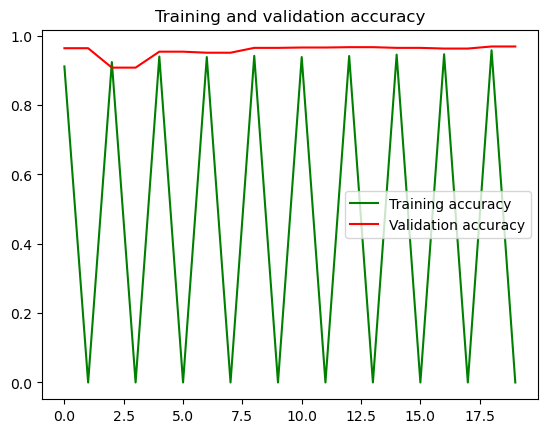

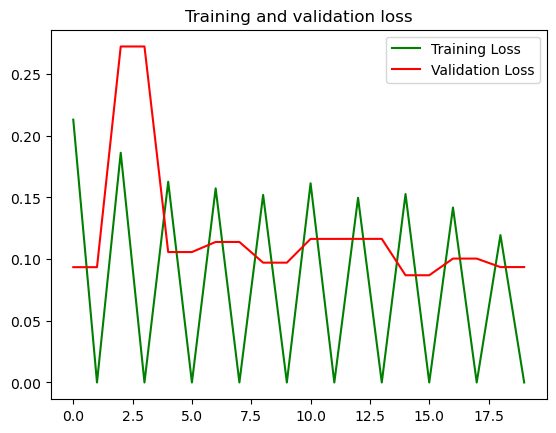

In [21]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
# 결과 : InceptionV3 pretrained model 사용 시 validation의 정확도가 크게 향상됨
# val_accuracy: 0.7440 ---> val_accuracy: 0.9690